<a class="anchor" id="0"></a>
# **Python ile Destek Vektör Makineleri Sınıflandırıcı Eğitimi** 

Destek Vektör Makineleri (kısaca SVM'ler), sınıflandırma ve regresyon amacıyla kullanılan denetimli makine öğrenme algoritmalarıdır. 
Bu notebookta, bir Pulsar yıldızını sınıflandırmak için bir Destek Vektör Makineleri sınıflandırıcısı oluşturacağız. 

Bu proje için **Bir Pulsar Yıldızını Tahmin Etme (Predicting a Pulsar Star)** veri setini kullanalım.

Öyleyse başlayalım.

# **1. Destek Vektör Makinelerine Giriş** <a class="anchor" id="1"></a>

**Support Vector Machines** (kısaca SVM'ler), sınıflandırma ve regresyon amacıyla kullanılan makine öğrenme algoritmalarıdır. SVM'ler, sınıflandırma, regresyon ve aykırı değer tespiti amaçları için güçlü makine öğrenimi algoritmalarından biridir. Bir SVM sınıflandırıcı, verilen kategorilerden birine yeni veri noktaları atayan bir model oluşturur. Bu nedenle, olasılıksal olmayan bir ikili doğrusal sınıflandırıcı olarak görülebilir.

SVM'ler doğrusal sınıflandırma amaçları için kullanılabilir. Doğrusal sınıflandırma gerçekleştirmeye ek olarak, SVM'ler **çekirdek hilesi (kernel trick)** kullanarak doğrusal olmayan bir sınıflandırmayı verimli bir şekilde gerçekleştirebilir. Girdileri örtük olarak yüksek boyutlu özellik uzaylarına eşlememizi sağlar.



# 2. Destek Vektör Makinesi Terminolojisi


### Hiperdüzlem (Hyperplane)

Hiper düzlem, farklı sınıf etiketlerine sahip veri noktaları arasında ayrım yapan bir karar sınırıdır. SVM sınıflandırıcısı, **maksimum marj miktarına sahip bir hiper düzlem kullanarak** veri noktalarını ayırır.

Bu hiperdüzlem, `maximum margin hyperplane ('maksimum marjlı hiperdüzlem)'` olarak bilinir ve tanımladığı doğrusal sınıflandırıcı ise `maximum margin classifier (maksimum marjlı sınıflandırıcı)` olarak bilinir.


### Destek Vektörler (Support Vectors)

Destek vektörleri, hiper düzleme en yakın olan örnek veri noktalarıdır. Bu veri noktaları, marjları hesaplayarak ayırma çizgisini veya hiper düzlemi daha iyi tanımlayacaktır.


### Marj (Margin)

Marj (kenar boşluğu-margin), en yakın veri noktalarındaki iki çizgi arasındaki ayrım boşluğudur. Vektörleri veya en yakın veri noktalarını desteklemek için çizgiden dikey mesafe olarak hesaplanır. SVM'lerde, maksimum marj elde etmek için bu ayrım boşluğunu maksimize etmeye çalışıyoruz.

Aşağıdaki diyagram bu kavramları görsel olarak göstermektedir.

### SVM'de Marj 

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)

SVM'lerde ana hedefimiz, verilen veri kümesindeki destek vektörleri arasında mümkün olan maksimum marjı olan bir hiperdüzlem seçmektir. SVM, aşağıdaki 2 adımlı süreçte maksimum marj hiper düzlemini arar –

1.	Sınıfları mümkün olan en iyi şekilde ayıran hiper düzlemler oluşturun. Verileri sınıflandırabilecek birçok hiper düzlem vardır. İki sınıf arasındaki en büyük ayrımı veya marjı temsil eden en iyi hiperdüzlemi aramalıyız.

2.	Bu nedenle, hiperdüzlemi, ondan her iki taraftaki destek vektörlerine olan uzaklığı maksimize edecek şekilde seçiyoruz.Böyle bir hiperdüzlem varsa, **maksimum marjlı hiperdüzlem (maximum margin hyperplane)** olarak bilinir ve tanımladığı lineer sınıflandırıcı, **maksimum marj sınıflandırıcı (maximum margin classifier)** olarak bilinir.

Aşağıdaki şema, **maksimum marj(maximum margin)** ve **maksimum marj hiperdüzlem (maximum margin hyperplane)** kavramını net bir şekilde göstermektedir.


### Maksimum marj hiperdüzlem (maximum margin hyperplane)

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)



### Dağınık veri kümeleriyle ilgili sorun

Bazen, örnek veri noktaları o kadar dağınıktır ki, onları doğrusal bir hiperdüzlem kullanarak ayırmak mümkün değildir.
Böyle bir durumda, SVM'ler, aşağıdaki şemada gösterildiği gibi giriş alanını daha yüksek boyutlu bir alana dönüştürmek için bir "çekirdek hilesi (kernel trick)" kullanır. 2 boyutlu girdi alanını 3 boyutlu girdi alanına dönüştürmek için bir eşleme işlevi kullanır. Artık, doğrusal ayırma kullanarak veri noktalarını kolayca ayırabiliriz.

### Çekirdek hilesi (Kernel Trick) - girdi uzayının daha yüksek boyutlu uzaya dönüştürülmesi

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)



# 3. Çekirdek hilesi (Kernel Trick)


Pratikte, SVM algoritması bir "çekirdek (kernel)" kullanılarak uygulanır. "Çekirdek hilesi(Kernel Trick)" adı verilen bir teknik kullanır. Basit bir deyişle, bir "çekirdek (kernel)", verilerin ayrışılbileceği daha yüksek bir boyuta eşleyen bir işlevdir. Çekirdek, düşük boyutlu bir girdi veri alanını daha yüksek boyutlu bir alana dönüştürür. **Böylece, lineer olmayan ayrılabilir problemleri, daha fazla boyut ekleyerek lineer ayrılabilir problemlere dönüştürür**. Böylece, çekirdek hilesi daha doğru bir sınıflandırıcı oluşturmamıza yardımcı olur. Bu nedenle, doğrusal olmayan ayırma problemlerinde yararlıdır.



Bir çekirdek fonksiyonunu aşağıdaki gibi tanımlayabiliriz:


### Çekirdek Fonksiyonu

![Kernel function](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTodZptqcRor0LGo8Qn7_kJB9n9BACMt6jgIPZ4C3g_rgh_uSRZLQ&s)

SVM'ler için kullanılan 4 popüler çekirdek vardır - `Linear kernel`,`Polynomial kernel`,`Radial Basis Function (RBF) kernel` (Gauss çekirdeği olarak da adlandırılır) ve `Sigmoid kernel`. Bunlar aşağıda açıklanmıştır -


## **3.1 Lineer çekirdek (Linear kernel)**

Doğrusal çekirdekte, çekirdek işlevi aşağıdaki gibi doğrusal bir işlev biçimini alır:

**doğrusal çekirdek (linear kernel) : K(xi , xj ) = xiT xj**

Doğrusal çekirdek, veriler doğrusal olarak ayrılabilir olduğunda kullanılır. Bu, verilerin tek bir satır kullanılarak ayrılabileceği anlamına gelir. En sık kullanılan çekirdeklerden biridir. **Çoğunlukla bir veri kümesinde çok sayıda özellik olduğunda kullanılır.** Doğrusal çekirdek genellikle metin sınıflandırma amacıyla kullanılır.

**Doğrusal bir çekirdekle eğitim genellikle daha hızlıdır, çünkü yalnızca C düzenlileştirme parametresini optimize etmemiz gerekir.** Diğer çekirdeklerle eğitim yaparken, γ parametresini de optimize etmemiz gerekir. Bu nedenle, bir ızgara araması (grid search) yapmak genellikle daha fazla zaman alacaktır.

Doğrusal çekirdek aşağıdaki şekil ile görselleştirilebilir.

### Linear Kernel

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

## **3.2 Polinom çekirdeği (Polynomial Kernel)**

Polinom çekirdeği, bir öznitelik uzayındaki vektörlerin (eğitim örnekleri) orijinal değişkenlerin polinomları üzerindeki benzerliğini temsil eder. Polinom çekirdeği, benzerliklerini belirlemek için yalnızca girdi örneklerinin verilen özelliklerine değil, aynı zamanda girdi örneklerinin kombinasyonlarına da bakar.

d.-derece polinomlar için polinom çekirdeği aşağıdaki gibi tanımlanır:

**Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0**

Polinom çekirdeği, Doğal Dil İşleme'de çok popülerdir. En yaygın derece d = 2'dir (quadratic), çünkü daha büyük dereceler NLP problemlerine fazla uyma (overfit) eğilimindedir. Aşağıdaki şema ile görselleştirilebilir.


### Polinom çekirdeği (Polynomial Kernel)

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

## **3.3 Radyal Temelli Fonksiyon Çekirdeği (Radial Basis Function Kernel)**

Radyal tabanlı fonksiyon çekirdeği, genel amaçlı bir çekirdektir. Veriler hakkında önceden bilgimiz olmadığında kullanılır. İki örnek x ve y üzerindeki RBF çekirdeği aşağıdaki denklemle tanımlanır:


### Radyal Temelli Fonksiyon Çekirdeği (Radial Basis Function Kernel)

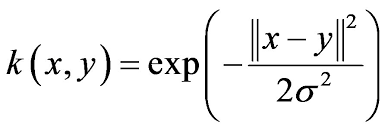

Aşağıdaki şema, rbf çekirdeği ile SVM sınıflandırmasını göstermektedir.

### rbf çekirdekli SVM Sınıflandırması

![SVM Classification with rbf kernel](https://www.researchgate.net/profile/Periklis_Gogas/publication/286180566/figure/fig5/AS:304327777374210@1449568804246/An-example-of-an-SVM-classification-using-the-RBF-kernel-The-two-classes-are-separated.png)

## **3.4 Sigmoid çekirdek**

Sigmoid çekirdeğin kökeni sinir ağlarındadır. Sinir ağları için proxy olarak kullanabiliriz. Sigmoid çekirdeği aşağıdaki denklemle verilir -


**sigmoid kernel : k (x, y) = tanh(αxTy + c)**

Sigmoid çekirdeği aşağıdaki şema ile görselleştirilebilir:

### Sigmoid çekirdek

![Sigmoid kernel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKeXbOIlniBXYwMYlEYLKPwZZg8vFU1wVm3RWMACjVcT4iBVDy&s)

# **4. SVM Scikit-Learn kütüphaneleri** <a class="anchor" id="4"></a>


Scikit-Learn, bir veri kümesinde Destek Vektör Makinesi algoritmasını uygulamak için yararlı kütüphaneleri sağlar. SVM'i sorunsuz bir şekilde uygulamamıza yardımcı olabilecek birçok kütüphane vardır. Sadece ihtiyaçlarımıza uygun parametrelerle kütüphaneyi aramamız gerekiyor. Bu notebookta, bir sınıflandırma görevi ile uğraşacaz. Bu yüzden SVM sınıflandırması için Scikit-Learn kütüphanelerinden bahsedeceğiz.

İlk olarak, bir **LinearSVC()** sınıflandırıcısı vardır. Adından da anlaşılacağı gibi, bu sınıflandırıcı yalnızca **doğrusal** çekirdek kullanır. LinearSVC() sınıflandırıcısında, yalnızca doğrusal sınıflandırma amacıyla kullanıldığından çekirdeğin değerini iletmiyoruz.

Scikit-Learn, sınıflandırma amacıyla kullanılan **SVC()** ve **NuSVC()** olmak üzere iki sınıflandırıcı daha sağlar. Bu sınıflandırıcılar, parametrelerde bazı farklılıkları olsa da büyük oranda benzerdir. **NuSVC()**, **SVC()** ile benzerdir ancak destek vektörlerinin sayısını kontrol etmek için bir parametre kullanır. Kernel, **gama ve C değerlerini** diğer parametrelerle birlikte iletiyoruz. **Çekirdek parametresi varsayılan olarak değeri olarak rbf'yi kullanır, ancak poli, doğrusal, sigmoid veya çağrılabilir işlev gibi değerleri iletebiliriz.**


# **5. Veri kümesinin ayrıntıları** <a class="anchor" id="5"></a>


Bu notebookta **Bir Pulsar Yıldızını Tahmin Etme (Predicting a Pulsar Star)** veri setini kullanacağız.

Pulsarlar, burada Dünya'da tespit edilebilen radyo emisyonu üreten nadir bir Nötron yıldızı türüdür. Uzay-zaman, yıldızlar arası ortam ve maddenin hallerinin sondaları olarak önemli bilimsel ilgiye sahiptirler. Özellikle veri kümelerini ikili sınıflandırma problemleri olarak ele alan sınıflandırma algoritmaları benimsenmektedir. Burada meşru pulsar örnekleri azınlık pozitif sınıfını ve sahte örnekler çoğunluk negatif sınıfını oluşturur.

Burada paylaşılan veri seti, **RFI/gürültü kaynaklı 16.259 sahte örnek ve 1.639 gerçek pulsar örneği** içermektedir. Her satır önce değişkenleri listeler ve sınıf etiketi son giriştir. Kullanılan sınıf etiketleri 0 (negatif) ve 1 (pozitif) şeklindedir.


### Öznitelikleri:

Her örnek, 8 sürekli değişken ve tek bir sınıf değişkeni ile tanımlanır. İlk dördü, entegre nabız profilinden elde edilen basit istatistiklerdir. Kalan dört değişken benzer şekilde DM-SNR eğrisinden elde edilir. Bunlar aşağıda özetlenmiştir:

1. Entegre profilin ortalaması (Mean of the integrated profile)

2. Entegre profilin standart sapması(Standard deviation of the integrated profile)

3. Entegre profilin aşırı basıklığı (Excess kurtosis of the integrated profile)

4. Entegre profilin eğriliği (Skewness of the integrated profile)

5. DM-SNR eğrisinin ortalaması (Mean of the DM-SNR curve)

6. DM-SNR eğrisinin standart sapması (Standard deviation of the DM-SNR curve)

7. DM-SNR eğrisinin aşırı basıklığı (Excess kurtosis of the DM-SNR curve)

8. DM-SNR eğrisinin eğriliği (Skewness of the DM-SNR curve)

9. Sınıf Etiketi

# **6. Kütüphaneleri Yükleyelim** <a class="anchor" id="6"></a>



Gerekli Python kitaplıklarını import ederek başlıyoruz.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# **7.Veri kümesini yüklemek** <a class="anchor" id="7"></a>



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#ROOT_DIR = "/content/drive/MyDrive/CASGEM-Egitim/Egitim-Part1/Day6-SupportVectorMachines/notebooks"
ROOT_DIR = "https://media.githubusercontent.com/media/yapay-ogrenme/casgem-eu-project-training-on-data-mining-2nd/main/PART1/Day6-SupportVectorMachines/notebooks"

DATASET_PATH = ROOT_DIR + "/datasets/"

In [ ]:
df = pd.read_csv(DATASET_PATH + 'pulsar_stars.csv')

# **8. Keşifsel veri analizi** <a class="anchor" id="8"></a>




Şimdi, veriler hakkında fikir edinmek için verileri keşfedeceğiz.

**Yapılacaklar: Veri kümesinin boyutlarını yazdırın.**

In [ ]:
# view dimensions of dataset
df.shape

Veri setinde 17898 örnek ve 9 değişken olduğunu görebiliriz.

In [ ]:
# let's preview the dataset
df.head()

Veri setinde 9 değişken olduğunu görebiliriz. (8 sürekli değişken ve 1 ayrık değişken) 
Ayrık değişken, `target_class`  değişkenidir. Aynı zamanda hedef değişkendir.

**Yapılacaklar: baştaki ve sondaki boşlukları kontrol etmek için sütun adlarını görüntüleyin.**


In [ ]:
# view the column names of the dataframe
col_names = df.columns
col_names

**Yapılacaklar: Kolon adlarının başındaki boşlukları kaldırın.**

In [ ]:
# remove leading spaces from column names
df.columns = df.columns.str.strip()

Sütun adlarının başındaki boşluklar kaldırıldı. Aynı şeyi doğrulamak için sütun adlarına tekrar bakalım.

In [ ]:
# view column names again
df.columns

Sütun adından baştaki boşlukların kaldırıldığını görebiliriz. Ancak sütun adları çok uzun. 
Bu yüzden onları yeniden adlandırarak kısaltıyoruz.

In [ ]:
# rename column names
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [ ]:
# view the renamed column names
df.columns

Sütun adlarının kısaltıldığını görebiliriz. IP, `integrated profile` (entegre profil) anlamına gelir ve DM-SNR, `delta modulation and signal to noise ratio` (delta modülasyonu ve sinyal-gürültü oranı) anlamına gelir. Artık sütunlarla çalışmak çok daha kolay.


Hedef değişkenimiz `target_class` sütunudur. Bu yüzden dağılımını kontrol edeceğiz.


**Yapılacaklar: hedef sütunun her birden değerden kaçar adet olduğuna bakın.**


In [ ]:
# check distribution of target_class column
df['target_class'].value_counts()

**Yapılacaklar: hedef sütunun değerlerinin tüm değerlere oranını yazdırınız.**

In [ ]:
# view the percentage distribution of target_class column
df['target_class'].value_counts()/np.float(len(df))

In [ ]:
df['target_class'].value_counts(normalize=True)

`0` ve `1` sınıf etiketinin gözlem yüzdesinin %90.84 ve %9.16 olduğunu görebiliriz. Yani, bu sınıf dengesiz bir problemdir.


In [ ]:
# view summary of dataset
df.info()

Veri setinde eksik değer olmadığını ve tüm değişkenlerin sayısal değişkenler olduğunu görebiliriz.

### Değişkenlerdeki eksik değerleri keşfedelim

**Yapılacaklar: tüm sütunlar için eksik verilerin kontrol ediniz.**

In [ ]:
# check for missing values in variables
df.isnull().sum()

Veri setinde eksik değer olmadığını görebiliriz.

### Sayısal değişkenlerin özeti


- Veri setinde 9 adet sayısal değişken bulunmaktadır.


- 8 sürekli değişkenler ve 1 ayrık değişkendir.


- Ayrık değişken, `target_class`değişkenidir. Aynı zamanda hedef değişkendir.


- Veri setinde eksik değer yok.

### Sayısal değişkenlerde aykırı değerler

In [ ]:
# view summary statistics in numerical variables
round(df.describe(),2)

Daha yakından incelendiğinde, tüm sürekli değişkenlerin aykırı değerler içerebileceğinden şüphelenebiliriz.

Yukarıdaki değişkenlerde aykırı değerleri görselleştirmek için boxplot çizeceğiz.

**Yapılacaklar: Her bir IP Mean, IP Sd, IP Kurtosis, IP Skewness, DM-SNR Mean, DM-SNR Sd, DM-SNR Kurtosis, DM-SNR Skewness kolonu için boxplot() çizdirin.**




In [ ]:
df.boxplot(column='IP Mean', figsize=(10,10))

In [ ]:
df.boxplot(column='IP Sd', figsize=(10,10))

In [ ]:
# draw boxplots to visualize outliers
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')



Yukarıdaki kutu grafikleri, bu değişkenlerde çok sayıda aykırı değer olduğunu doğrulamaktadır.

### Aykırı değerleri SVM'lerle ele alalım

SVM'lerin 2 çeşidi vardır. Bunlar SVM'in `hard-margin variant of SVM` ve SVM'in `soft-margin variant of SVM`'ıdır.

SVM'in sert marjlı çeşidi (hard-margin variant of SVM) aykırı değerlerle ilgilenmez. Bu durumda, her eğitim noktasını en az 1 marj ile doğru bir şekilde sınıflandırılacak şekilde maksimum marjlı hiperdüzlemi bulmak istiyoruz. Bu teknik aykırı değerlerle iyi bir şekilde başa çıkamaz.

SVM'in başka bir versiyonuna SVM'in yumuşak marjlı varyantı (soft-margin variant of SVM) denir. Bu durumda, yanlış sınıflandırılmış birkaç noktamız olabilir veya 1'den küçük bir marjla sınıflandırılır. Ancak her nokta için, aykırı değerleri kontrol eden 'C' parametresi şeklinde bir ceza ödememiz gerekir. "Düşük C", daha fazla aykırı değere izin verdiğimizi ve "yüksek C", daha az aykırı değer anlamına gelir.

**Yani bu durumda, bu veri kümesi aykırı değerler içerdiğinden, modeli eğitirken C'nin değerinin yüksek olması gerekmektedir.**


### Değişkenlerin dağılımını kontrol edelim

Şimdi, dağılımların normal mi yoksa çarpık mı olduğunu anlamak için histogramları çizelim.

**Yapılacaklar: Her bir IP Mean, IP Sd, IP Kurtosis, IP Skewness, DM-SNR Mean, DM-SNR Sd, DM-SNR Kurtosis, DM-SNR Skewness kolonu için histogramı (bins=20) çizdirin.**


In [ ]:
df['IP Mean'].hist(bins=50)

In [ ]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')


8 sürekli değişkenin hepsinin çarpık olduğunu görebiliriz. 

# **9. Özellik vektörü ve hedef değişkeni bildirelim** <a class="anchor" id="9"></a>



**Yapılacaklar: y değişkenine sadece target_class kolonunu, X değişkenine de target_class haricindekileri tanımlayın.**


In [ ]:
df

In [ ]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

In [ ]:
X

In [ ]:
y

# **10. Verileri eğitim ve test setlerine ayıralım** <a class="anchor" id="10"></a>


**Yapılacaklar:** 

*   **StandartScaler ile öznitelikleri ölçeklendirin.** 

*   **Eğitim ve test kümesini %80-20 şeklinde ayırın.**


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)

#X_test = scaler.transform(X_test)

In [ ]:
X_scaler

In [ ]:
X.shape

In [ ]:
type(X_scaler)

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
X_train

Artık SVM sınıflandırıcısına vermeye hazır 'X_train' veri setimiz var.


# **12. SVM'yi varsayılan hiper parametrelerle çalıştıralım** <a class="anchor" id="12"></a>

Varsayılan hiperparametre, diğer parametrelerin yanı sıra C=1.0, kernel=`rbf` ve gamma=`auto` anlamına gelir.

**Yapılacaklar: Default hiperparametreler ile SVM sınıflandırıcısı ile sınıflandırın**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

**Yapılacaklar: Test kümesi ile prediction sonuçlarını elde edin ve accuracy_score() ile modelin sınıflandırma başarımını hesaplayın.**

In [ ]:
# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
y_pred

### SVM'yi rbf çekirdeği ve C=100.0 ile çalıştırın

Veri setimizde aykırı değerler olduğunu gördük. Bu nedenle, C'nin değerini artırmalıyız, çünkü daha yüksek C, daha az aykırı değer anlamına gelir.
SVM'yi kernel=`rbf` ve C=100.0 ile çalıştıralım.

**Yapılacaklar: çekirdek olarak rbf ve C=100.0 hiperparametreleri lie SVM modeli eğitin.**

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

**Yapılacaklar: Test kümesi ile prediction sonuçlarını elde edin ve accuracy_score() ile modelin sınıflandırma başarımını hesaplayın.**

In [ ]:
# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Daha yüksek C daha az aykırı değer anlamına geldiğinden, C=100.0 ile daha yüksek bir doğruluk elde ettiğimizi görebiliriz.

Şimdi, C=1000.0 değerini daha da artıralım ve doğruluğunu kontrol edelim.

### SVM'yi rbf çekirdeği ve C=1000.0 ile çalıştıralım


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Bu durumda doğruluğun C=1000.0 ile azaldığını görebiliriz.

# **13. SVM'yi linear kernel ile çalıştıralım** <a class="anchor" id="13"></a>


### SVM'yi linear kernel ve C=1.0 ile çalıştıralım.

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

### SVM'i linear kernel ve C=100.0 ile çalıştıralım.

In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

# fit classifier to training set
linear_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### SVM'i linear kernel ve C=1000.0 ile çalıştıralım.

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# fit classifier to training set
linear_svc1000.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc1000.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C=1.0'a göre C=100.0 ve C=1000.0 ile daha yüksek doğruluk elde edebileceğimizi görebiliriz.

Burada, **y_test** gerçek sınıf etiketleridir ve **y_pred**, test kümesindeki tahmin edilen sınıf etiketleridir.

### Eğitim seti ve test seti doğruluğunu karşılaştıralım.


Şimdi, aşırı uyum (overfit) olup olmadığını kontrol etmek için eğitim seti ve test seti doğruluğunu karşılaştıralım.

In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Eğitim seti ve test seti doğruluğunun çok karşılaştırılabilir olduğunu görebiliriz.

### Fazla ve eksik uyum olup olmadığını kontrol edelim.

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Eğitim seti doğruluk puanı 0.9783 iken test seti doğruluğu 0.9830'dur. Bu iki değer oldukça karşılaştırılabilir. Yani, fazla uydurma sorunu yoktur.

# **14. SVM'i polynomial kernel ile çalıştıralım** <a class="anchor" id="14"></a>

### SVM'yi polynomial kernel ve C=1.0 ile çalıştıralım

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

 ### SVM'i polynomial kernel ve C=100.0 ile çalıştıralım.

In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=poly_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Polinom çekirdek düşük performans verir. Eğitim setine fazla uyuyor olabilir.

# **15. SVM'i sigmoid kernel ile çalıştıralım** <a class="anchor" id="15"></a>

### SVM'yi sigmoid kernel ve C=1.0 ile çalıştıralım

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### SVM'yi sigmoid kernel ve C=100.0 ile çalıştıralım

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Aynı polinom çekirdeğinde olduğu gibi sigmoid çekirdeğin de kötü performans gösterdiğini görebiliriz.

### Yorumlar

`rbf` ve `linear` kernel ile C=100.0 ile maksimum doğruluk elde ediyoruz (doğruluk 0.9832'dir). Yukarıdaki analize dayanarak, sınıflandırma modeli doğruluğumuzun çok iyi olduğu sonucuna varabiliriz. Modelimiz, sınıf etiketlerini tahmin etme açısından çok iyi bir iş çıkarıyor.

Ama bu doğru değil. Burada dengesiz bir veri setimiz var. Sorun şu ki, doğruluk, dengesiz veri kümesi probleminde tahmine dayalı performansı ölçmek için yetersiz bir ölçüdür.

Bu nedenle, model seçiminde daha iyi rehberlik sağlayan alternatif ölçümleri araştırmalıyız. Özellikle, değerlerin altında yatan dağılımı ve sınıflandırıcımızın yaptığı hataların türünü bilmek isteriz.

Dengesiz sınıflar probleminde model performansını analiz etmek için böyle bir metrik "Karışıklık matrisi"dir.


# **16. Confusion matrix** <a class="anchor" id="16"></a>

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Karışıklık matrisi "3289 + 230 = 3519 doğru tahmin" ve "17 + 44 = 61 yanlış tahmin" gösterir.

Bu durumda, elimizde

- `Gerçek Pozitifler (True Positives)` (Actual Positive:1 and Predict Positive:1) - 3289


- `Gerçek Negatif (True Negatives)` (Actual Negative:0 and Predict Negative:0) - 230


- `Yanlış Pozitifler (False Positives)` (Actual Negative:0 but Predict Positive:1) - 17 `(Type I error)`


- `Yanlış Negatifler (False Negatives)` (Actual Positive:1 but Predict Negative:0) - 44 `(Type II error)`

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **17. Sınıflandırma metrikleri** <a class="anchor" id="17"></a>


### Sınıflandırma Raporu

**Sınıflandırma raporu (Classification report)**, sınıflandırma modeli performansını değerlendirmenin başka bir yoludur. Model için **kesinlik (precision)**, **duyarlılık(recall)**, **f1** ve **destek (support)** puanlarını görüntüler.

Aşağıdaki gibi bir sınıflandırma raporu yazdırabiliriz:-


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

### Sınıflandırma Doğruluğu

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


### Sınıflandırma Hatası

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


### Kesinlik (Precision)

**Kesinlik (Precision)**, tahmin edilen tüm olumlu sonuçlar içinde doğru tahmin edilen olumlu sonuçların yüzdesi olarak tanımlanabilir. Gerçek pozitiflerin (TP) doğru ve yanlış pozitiflerin (TP + FP) toplamına oranı olarak verilebilir.

Bu nedenle, **Kesinlik**, doğru tahmin edilen olumlu sonucun oranını tanımlar. Negatif sınıftan çok pozitif sınıfla ilgilenir.

Matematiksel olarak kesinlik, 'TP'nin (TP + FP)'ye oranı olarak tanımlanabilir.




In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


### Duyarlılık(Recall)

Duyarlılık(Recall), tüm gerçek olumlu sonuçlardan doğru olarak tahmin edilen olumlu sonuçların yüzdesi olarak tanımlanabilir.
Gerçek pozitiflerin (TP) gerçek pozitiflerin ve yanlış negatiflerin (TP + FN) toplamına oranı olarak verilebilir. **Duyarlılık(Recall)** aynı zamanda **Hassasiyet (Sensitivity)** olarak da adlandırılır.

**Duyarlılık(Recall)**, doğru tahmin edilen gerçek pozitiflerin oranını tanımlar.

Matematiksel olarak, **hatırlama**, 'TP'nin (TP + FN)' oranı olarak tanımlanabilir.



In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

### Gerçek Pozitif Oran (True Positive Rate)

**Gerçek Pozitif Oran (True Positive Rate)**, **Recall** ile eş anlamlıdır.


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

### Yanlış Pozitif Oran

In [ ]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

### Özgüllük (Specificity)

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

### F1-Skoru


**F1-Skoru** kesinlik ve duyarlılığın ağırlıklı harmonik ortalamasıdır. Mümkün olan en iyi **f1 skoru** 1.0 ve en kötüsü ise 0.0 olacaktır. 

**f1-skor**, kesinlik ve duyarlılığın harmonik ortalamasıdır. 

Bu nedenle, **f1-skor**, hesaplamalarına kesinlik ve duyarlılık yerleştirdiklerinden, doğruluk ölçümlerinden her zaman daha düşüktür. 

Sınıflandırıcı modellerini karşılaştırmak için genel doğruluk değil, ağırlıklı ortalama "f1-puanı" kullanılmalıdır.


# **18. ROC - AUC** <a class="anchor" id="18"></a>

### ROC Curve

Sınıflandırma modeli performansını görsel olarak ölçmek için başka bir araç **ROC Eğrisi**'dir. ROC Eğrisi, **Receiver Operating Characteristic Curve** anlamına gelir. **ROC Eğrisi**, çeşitli sınıflandırma eşik seviyelerinde bir sınıflandırma modelinin performansını gösteren bir grafiktir.

**ROC Eğrisi**, çeşitli eşik seviyelerinde **Yanlış Pozitif Oranı (FPR)** karşısında **Gerçek Pozitif Oranı (TPR)** gösterir.

**Gerçek Pozitif Oran (TPR)** aynı zamanda **Duyarlılık(Recall)** olarak da adlandırılır. 'TP'nin (TP + FN)'ye oranı olarak tanımlanır.

**Yanlış Pozitif Oranı (FPR)**, 'FP'nin (FP + TN)' oranı olarak tanımlanır.


ROC Eğrisinde, tek bir noktanın TPR (True Positive Rate) ve FPR (False Positive Rate) değerlerine odaklanacağız. Bu bize çeşitli eşik seviyelerinde TPR ve FPR'den oluşan ROC eğrisinin genel performansını verecektir. Bu nedenle, bir ROC Eğrisi, farklı sınıflandırma eşik seviyelerinde TPR'ye karşı FPR'yi çizer. 

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC eğrisi, belirli bir bağlam için duyarlılık ve özgüllüğü dengeleyen bir eşik düzeyi seçmemize yardımcı olur.

### ROC  AUC

**ROC AUC**, **Receiver Operating Characteristic - Area Under Curve** anlamına gelir. Sınıflandırıcı performansını karşılaştırmak için bir tekniktir. 

Bu teknikte 'eğrinin altındaki alanı (AUC)' ölçüyoruz. 

Mükemmel bir sınıflandırıcının ROC AUC'si 1'e eşitken, tamamen rastgele bir sınıflandırıcının ROC AUC'si 0,5'e eşit olacaktır.

Dolayısıyla, **ROC AUC**, eğrinin altındaki ROC grafiğinin yüzdesidir.

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

### Yorumlar

- ROC AUC, sınıflandırıcı performansının tek sayılı bir özetidir. Değer ne kadar yüksek olursa, sınıflandırıcı o kadar iyi olur.

- Modelimizin ROC AUC'si 1'e yaklaşıyor. Böylece, sınıflandırıcımızın pulsar yıldızını sınıflandırmada iyi bir iş çıkardığı sonucuna varabiliriz.


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

# **19. Karışık bölme ile katmanlı k-kat Çapraz Doğrulama (Stratified k-fold Cross Validation with shuffle split)** <a class="anchor" id="19"></a>

k-kat çapraz doğrulama, model performansını değerlendirmek için çok kullanışlı bir tekniktir. Ancak burada başarısız oluyor çünkü dengesiz bir veri setimiz var. Bu nedenle, dengesiz veri kümesi durumunda, model performansını değerlendirmek için başka bir teknik kullanacağız. Buna 'katmanlı k-kat çapraz doğrulama'  (`stratified k-fold cross-validation`) denir.


'Katmanlı k-kat çapraz doğrulama'da, verileri sınıflar arasındaki oranlar tüm veri kümesinde olduğu gibi her katta aynı olacak şekilde böleriz.

Ayrıca, bölmeden önce verileri karıştıracağız çünkü karıştırma çok daha iyi sonuç verir.

### Doğrusal çekirdekli (Linear Kernel) shuffle split ile Katmanlı k-Fold Çapraz Doğrulama

In [ ]:
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

s_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

linear_svc = SVC(kernel='linear')

linear_scores = cross_val_score(linear_svc, X, y, cv=s_kfold)

In [ ]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

In [ ]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

### rbf kernel'li shuffle split ile Katmanlı k-Fold Çapraz Doğrulama  

In [ ]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=s_kfold)

In [ ]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

In [ ]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

### Yorumlar

Doğrusal çekirdek ile 0.9789'luk daha yüksek ortalama katmanlı k-kat çapraz doğrulama puanı elde ediyoruz, ancak model doğruluğu 0.9832.

Bu nedenle, katmanlı çapraz doğrulama tekniği model performansını iyileştirmeye yardımcı olmaz.


# 20. GridSearch CV kullanarak Hiperparametre Optimizasyonu


In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
svm_best=SVC(kernel='rbf', C=10.0, gamma=0.3) 


# fit classifier to training set
svm_best.fit(X_train,y_train)


# make predictions on test set
y_pred=svm_best.predict(X_test)

In [ ]:
X.shape

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_test

In [ ]:
y_pred=svm_best.predict(X_test)

In [ ]:
X_test["sonuclarimiz"] = y_pred
X_test

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

### Yorumlar

- Orijinal model test doğruluğumuz 0.9832 iken, test setindeki GridSearch CV puanı 0.9835'tir.


- Böylece, GridSearch CV, bu belirli model için performansı artıracak parametreleri belirlemeye yardımcı olur.


- Burada, 'grid_search'ün `best_score_` özniteliği ile test setindeki `score` yöntemini karıştırmamalıyız.


- Test setindeki `score` yöntemi, modelin genelleme performansını verir. `score` yöntemini kullanarak, tüm eğitim seti üzerinde eğitilmiş bir model kullanıyoruz.


- `best_score_` özelliği, eğitim setinde gerçekleştirilen çapraz doğrulama ile ortalama çapraz doğrulama doğruluğunu verir.


# **21. Sonuç ve Kapanış** <a class="anchor" id="21"></a>

1. Veri setimizde aykırı değerler var. Bu nedenle, daha az aykırı değeri sınırlamak için C değerini artırdıkça doğruluk arttı. Bu, farklı çekirdek türleri için geçerlidir.

2. 'rbf' ve 'linear' kernel ile C=100.0 ile maksimum doğruluk elde ediyoruz ve doğruluk 0.9832'dir. Dolayısıyla, sınıf etiketlerini tahmin etme açısından modelimizin çok iyi bir iş çıkardığı sonucuna varabiliriz. Ama bu doğru değil. Burada dengesiz bir veri setimiz var. Doğruluk, dengesiz veri kümesi probleminde tahmine dayalı performansı ölçmek için yetersiz bir ölçüdür. Bu nedenle, model seçiminde daha iyi rehberlik sağlayan "karışıklık matrisi"ni araştırmalıyız.

3. Modelimizin ROC AUC'si 1'e çok yakındır. Dolayısıyla, sınıflandırıcımızın pulsar yıldızını sınıflandırmada iyi bir iş çıkardığı sonucuna varabiliriz.

4. Doğrusal çekirdek ile 0.9789'luk daha yüksek ortalama katmanlı k-kat çapraz doğrulama puanı elde ettik, ancak model doğruluğu 0.9832'dir. Bu nedenle, katmanlı çapraz doğrulama tekniği model performansını iyileştirmeye yardımcı olmadı.

5. Orijinal model test doğruluğumuz 0.9832 iken, test setindeki GridSearch CV puanı 0.9835'tir. Bu nedenle GridSearch CV, bu belirli model için performansı artıracak parametreleri belirlemeye yardımcı olur.

# **22. Referanslar** <a class="anchor" id="22"></a>


  1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

  2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

  3. Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

  4. Udemy course – Feature Engineering for Machine Learning by Soledad Galli

  5. https://en.wikipedia.org/wiki/Support-vector_machine

  6. https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

  7. http://dataaspirant.com/2017/01/13/support-vector-machine-algorithm/

  8. https://www.ritchieng.com/machine-learning-evaluate-classification-model/

  9. https://en.wikipedia.org/wiki/Kernel_method

  10. https://en.wikipedia.org/wiki/Polynomial_kernel

  11. https://en.wikipedia.org/wiki/Radial_basis_function_kernel

  12. https://data-flair.training/blogs/svm-kernel-functions/